In [205]:
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
accidents = pd.read_csv("data/processed/Road Safety Data - Accidents 2019.csv") 
vehicle   = pd.read_csv("data/processed/Road Safety Data - Vehicles 2019.csv")
casualty  = pd.read_csv("data/processed/Road Safety Data - Vehicles 2019.csv")

result = pd.concat([accidents, vehicle, casualty], axis=1)

C:\Users\Ruben PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Ruben PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [207]:
#list(accidents.columns)

In [208]:
date = accidents["Date"]
print(min(date),max(date))

01/01/2019 31/12/2019


# Locating our city (Sheffield)
Sheffield has the coordinates (lat, long) = (53.381130, -1.470085) thus we bounded the city limits from the followingcoordinates

Or we just used the LAD

In [209]:
sheffield = (accidents["Local_Authority_(District)"]==215)

accidents = accidents[sheffield]
#AI = accidents["Accident_Index"]
#sheffield = (accidents['Latitude'] <53.5) & (accidents['Latitude'] >53.3) & (accidents['Longitude'] >-1.6) & (accidents['Longitude'] <-1.24)
#accidents[sheffield]

#lower left boundary 
# 53.31784689534474, -1.5958092090551617

#lower right boundary 
# 53.33503315296722, -1.2455193656692596

#upper right boundary 
# 53.478059610235235, -1.255824700888895

#upper left boundary
# 53.48606627063434, -1.534689658737156

# Accidents each day from 01/01/2019 to 31/12/2019 in Sheffield

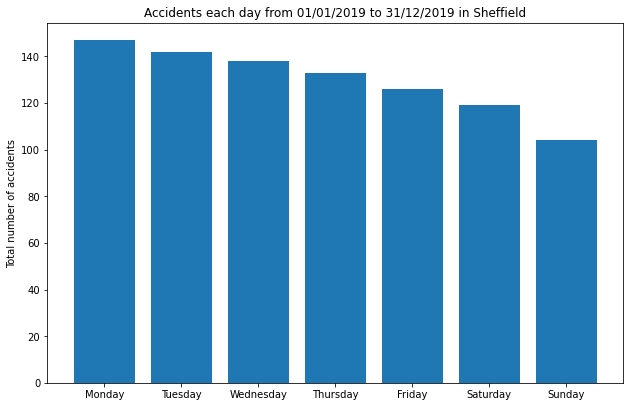

In [51]:
week = ["Monday", "Tuesday", "Wednesday","Thursday","Friday", "Saturday", "Sunday"]
unq = accidents["Day_of_Week"].unique()
count = accidents["Day_of_Week"].value_counts()
fig = plt.figure(figsize=(8, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title("Accidents each day from 01/01/2019 to 31/12/2019 in Sheffield")
axes.set_ylabel("Total number of accidents")
axes.bar(sorted(unq), count, tick_label = week)
plt.plot();

# Number of Casualties in 2019



In [52]:
sum(accidents['Number_of_Casualties'])

1191

# Sum of casualties each day in sheffield

In [53]:
Sunday    =  (accidents['Day_of_Week']==1)
Monday    =  (accidents['Day_of_Week']==2) 
Tuesday   =  (accidents['Day_of_Week']==3)
Wednesday =  (accidents['Day_of_Week']==4)
Thursday  =  (accidents['Day_of_Week']==5)
Friday    =  (accidents['Day_of_Week']==6)
Saturday  =  (accidents['Day_of_Week']==7)

week_masks = [Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday]
entire = [sum(accidents['Number_of_Casualties'][i]) for i in week_masks]

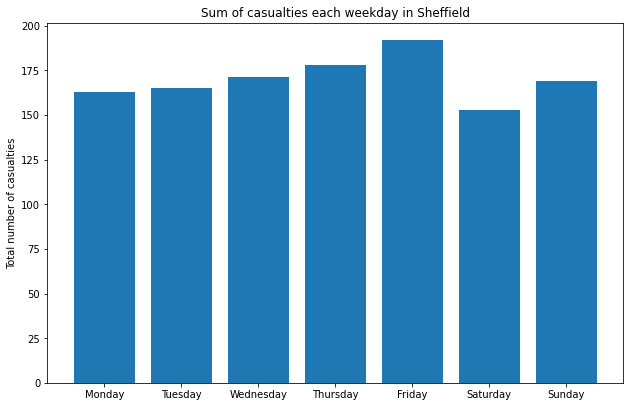

In [54]:
fig = plt.figure(figsize=(8, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title("Sum of casualties each weekday in Sheffield")
axes.set_ylabel("Total number of casualties")
axes.bar(week, entire, tick_label = week)
plt.plot();

# Most deadly accident in Sheffield
The most deadly accident in Sheffield has a total of 13 deaths 

In [55]:
mx = max(accidents['Number_of_Casualties'])
mask = (accidents['Number_of_Casualties'] == mx)
accidents[mask]

<ipython-input-55-7d4fbe8e6e4c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  accidents[mask][sheffield]


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
45460,2019140838359,441195.0,389563.0,-1.38188,53.401308,14,3,2,13,10/05/2019,...,0,0,1,1,1,0,0,2,1,E01007903


# Task 1
Report the frequency of road collisions in your city for 1) different age groups, 2) in different times
(during the day, the week, or year), 3) and for differences in one other condition.

In [146]:
accidents["Accident_Index"].size

909

There was a total of 909 accidents in the Sheffield district in 2019

In [228]:
mask_age = (vehicle["Age_of_Driver"] >= 0)
AoD = vehicle["Age_of_Driver"][mask_age]

In [145]:
VAI = vehicle["Accident_Index"]

In [224]:
sheffield = (result["Local_Authority_(District)"] == 215)
data = result[sheffield]


In [232]:
data = data.loc[:,~data.columns.duplicated()]

mask_age = (data["Age_of_Driver"] >= 0)
AoD = data["Age_of_Driver"][mask_age]

In [239]:
AoD[]

41.949547218628716